**Name : Abhishek Anand**


**Importing All The Libraries**

In [86]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [87]:
np.random.seed(100)
sns.set()
plt.rcParams['figure.figsize'] = 18, 8

In [117]:
# Reading data
#dataf= pd.read_csv('student_scores.csv')
url="http://bit.ly/w-data"
dataf=pd.read_csv(url)
print('data imported successfully')

data imported successfully


In [118]:
#data is imported 
dataf.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Showing the data information**

In [119]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [120]:
#chinging the data type of score
dataf['Scores']=dataf['Scores'].astype('float64')
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


In [121]:
#details of all dataframes
dataf.describe().all

<bound method DataFrame.all of            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000>

**plot of relationship between columns**

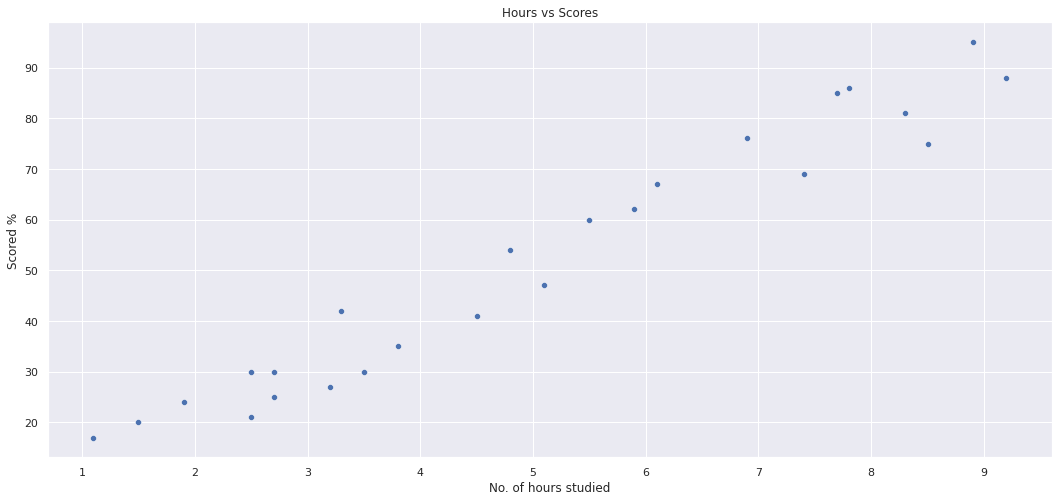

In [122]:
sns.scatterplot(data=dataf,x='Hours',y='Scores')
plt.title('Hours vs Scores')
plt.xlabel('No. of hours studied')
plt.ylabel('Scored %')
plt.show()

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <a list of 10 Patch objects>)

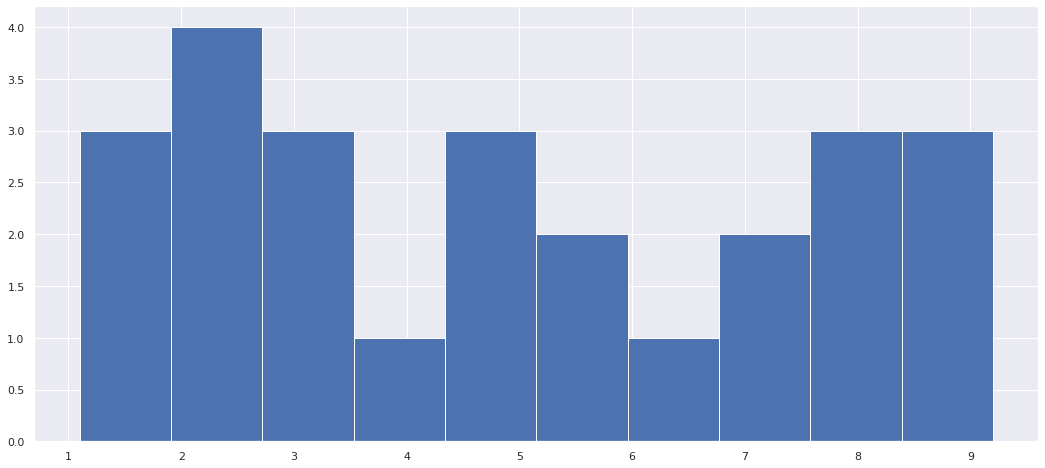

In [123]:
plt.hist(dataf['Hours'])

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

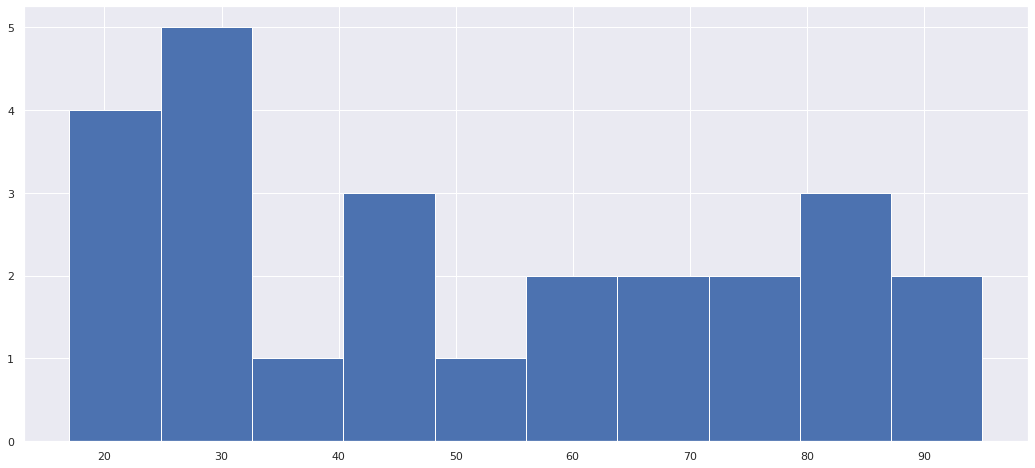

In [124]:
plt.hist(dataf['Scores'])

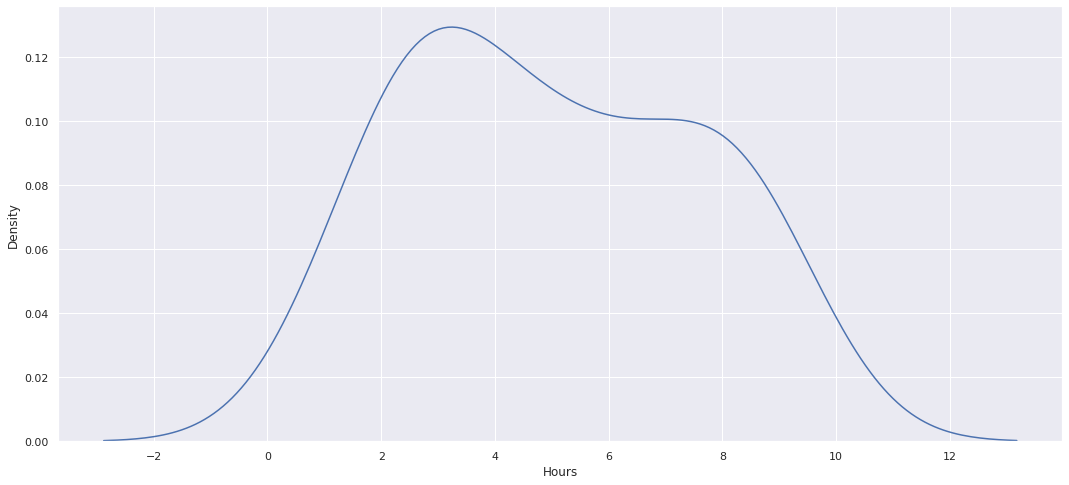

In [125]:
sns.kdeplot(dataf['Hours'])

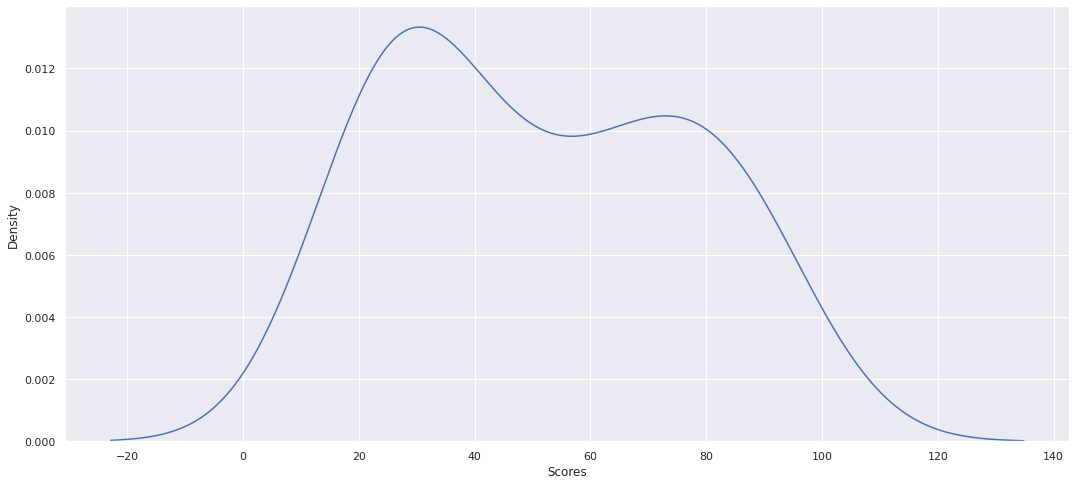

In [126]:
sns.kdeplot(dataf['Scores'])

In [127]:
# The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
X = df['Hours'].values
Y = df['Scores'].values

In [128]:
X.shape

(25,)

In [129]:
Y.shape

(25,)

In [130]:

X = X.reshape(25, 1)
X.shape

(25, 1)

In [131]:
# Now we split our data into train and test set. 
#Here our model will train its parameters by train set and then predict on test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 60)

**Linear regression model creation**

In [132]:
lr = LinearRegression() # Created Linear Regression Model
lr.fit(X_train, y_train) # Trained your Model with sample data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

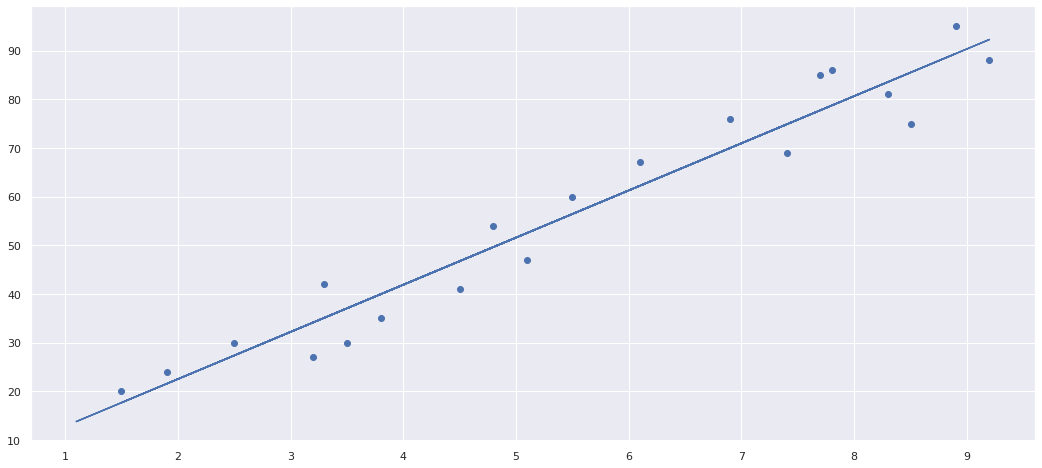

In [133]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train)
plt.plot(X, line);
plt.show()

In [134]:
# Predicted Values
y_pred = lr.predict(X_test)
y_pred

array([13.76560485, 29.27126825, 60.28259506, 27.33306033, 29.27126825])


**MSE, MAE, R2_score**

In [135]:
mean_squared_error(y_test,y_pred)

14.458645457297166

In [136]:
r2_score(y_test,y_pred)

0.944131972730691

In [137]:
mean_absolute_error(y_test, y_pred)

3.256972083783501

In [138]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.802452558191511

In [139]:
#now see the actual value of y_test and the predicted value of the model y_pred
dataf=pd.DataFrame({'Actual' : y_test,'predicted':y_pred})
dataf

,Actual,predicted
0,17,13.765605
1,30,29.271268
2,62,60.282595
3,21,27.333060
4,25,29.271268


In [140]:
#  Now predicting  for 9.25 hours
new_data = np.array([9.25]).reshape(1,1)
new_data.shape

(1, 1)

In [141]:
# Predicted Score
own_pred = lr.predict(new_data)
print("No of Hours = {}".format(new_data[0]))
print("Predicted Score = {}".format(own_pred))

No of Hours = [9.25]
Predicted Score = [92.74757781]


In [142]:
X_line = X
Y_line = lr.coef_ * X+ lr.intercept_

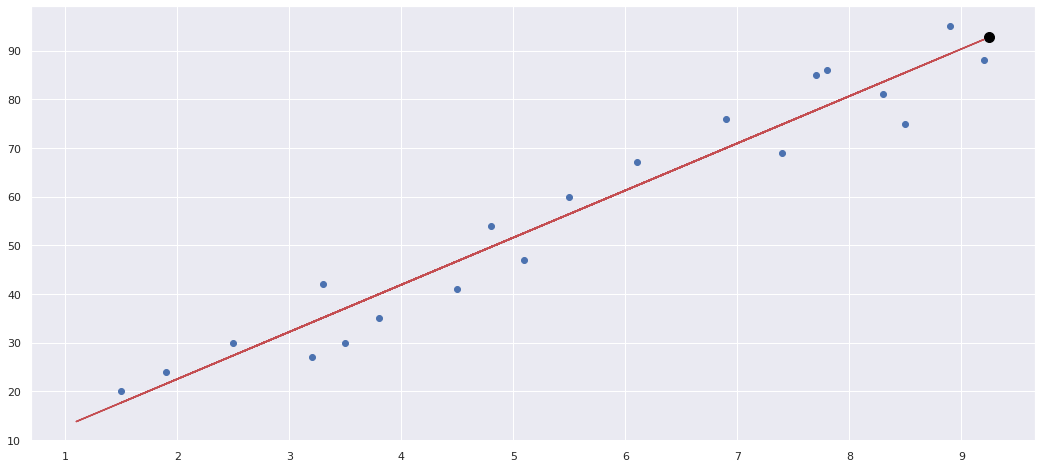

In [143]:
# Scatter Plot
plt.scatter(X_train, y_train)
plt.scatter(new_data.reshape(1), own_pred, c='black', s=100)
plt.plot(X_line, Y_line, c='r')
plt.show()

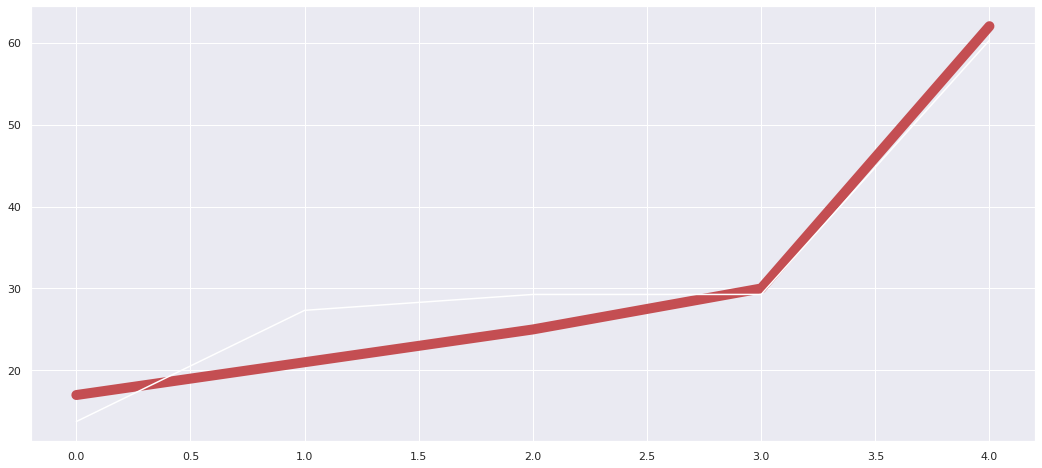

In [144]:
plt.plot(sorted(y_test),c='r',linewidth = 10)
plt.plot(sorted(y_pred),c='w')
plt.show()

In [145]:
# Printing ALL 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_pred, y_test)
print('mean_squared_error:', mse)
print('mean_absolute_error:', mae)
print('r2_score:', r2)

mean_squared_error: 14.458645457297166
mean_absolute_error: 3.256972083783501
r2_score: 0.9381617352415519
